# Exploratory Data Analysis - MENTAL  HEALTH

Este proyecto busca explorar los factores que pueden estar relacionados con la ansiedad y depresión en trabajadores. El objetivo del siguiente archivo es la limpieza y categorización de los datos para una posterior mejor visualizacion de estos. 

## 1️⃣ Preparación del entorno

In [77]:
# Instalar librerías

%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2️⃣ Carga de datasets

### Descripción del conjunto de datos

El siguiente conjunto de datos contine 10.000 filas, es decir, respuestas. Estas respuestas son de personas encuestadas en sus respectivos puestos de trabajo. 

In [ ]:
df = pd.read_csv('mental_health_dataset.csv')

In [ ]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

### Comprobación de nulos

In [ ]:
print("\n❓ Valores nulos - Mental Health dataset:")
display(df.isnull().sum())


❓ Valores nulos - Mental Health dataset:


age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

### Detección y visualización de outliers

In [ ]:
num_cols = df.select_dtypes(include=["int", "float"]).columns

print(f"📊 Variables numéricas analizadas: {list(num_cols)}\n")

📊 Variables numéricas analizadas: ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']



In [ ]:
# Función para calcular outliers con método IQR (Interquartile Range)
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25) # 1er cuartil (25% de los datos)
    Q3 = df[col].quantile(0.75) # 3er cuartil (75% de los datos)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR # Límite inferior
    upper = Q3 + 1.5 * IQR # Límite superior

    # Filtrar filas donde la columna está fuera de los límites
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    # Retorna: cantidad de outliers, límite inferior, límite superior
    return outliers.shape[0], lower, upper

# Se considera un valor atípico si está muy lejos del rango central

In [ ]:
# Resumen de outliers por variable

# Creamos un diccionario vacío donde vamos a guardar el resumen de outliers
outliers_resumen = {}

# Aplicamos la función detectar_outliers a cada columna
for col in num_cols:
    n_out, low, up = detectar_outliers(col)

    # Guardamos los resultados en el diccionario outliers_resumen
    outliers_resumen[col] = {
        "N_outliers": n_out,
        "Límite inferior": round(low, 2), # redondeamos a 2 decimales
        "Límite superior": round(up, 2) # redondeamos a 2 decimales
    }

In [ ]:
# Mostrar tabla de resumen
outliers_df = pd.DataFrame(outliers_resumen).T
display(outliers_df)
### Lectura de los ouliners: n_outliers_ numero de valores atipicos detectados en esa variable, valor minimo aceptable dentro del radon normal y limite superior valor máximo dentro del rango normal. En los datos numericos no se encuentran outliers. 

,N_outliers,Límite inferior,Límite superior
age,0.0,-4.5,87.5
stress_level,0.0,-4.5,15.5
sleep_hours,0.0,2.5,10.5
physical_activity_days,0.0,-2.5,9.5
depression_score,0.0,-17.0,47.0
anxiety_score,0.0,-11.5,32.5
social_support_score,0.0,-51.5,152.5
productivity_score,0.0,30.7,124.3


In [ ]:
df.dtypes

age                         int64
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level                int64
sleep_hours               float64
physical_activity_days      int64
depression_score            int64
anxiety_score               int64
social_support_score        int64
productivity_score        float64
mental_health_risk         object
dtype: object

In [ ]:
columnas_df_objeto = df.select_dtypes(include='object').columns
print(columnas_df_objeto)


Index(['gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'mental_health_risk'],
      dtype='object')


In [ ]:
for col in columnas_df_objeto: 
    print(f"\n {col}")
    print(df[col].unique())


 gender
['Male' 'Female' 'Non-binary' 'Prefer not to say']

 employment_status
['Employed' 'Student' 'Self-employed' 'Unemployed']

 work_environment
['On-site' 'Remote' 'Hybrid']

 mental_health_history
['Yes' 'No']

 seeks_treatment
['Yes' 'No']

 mental_health_risk
['High' 'Medium' 'Low']


## 3️⃣ Categorización de variables


anxiety_score : GAD-7 (Generalized Anxiety Disorder-7)  The GAD-7 total score for the seven items ranges from 0 to 21. Scores of 5, 10, and 15 represent cut points for mild, moderate, and severe anxiety, respectively.”


| PUNTAJE TOTAL | NIVEL DE ANSIEDAD     |
|---------------|---------------------|
| 0 - 4         | Mínimo o ninguno     |
| 5 - 9         | Leve                 |
| 10 - 14       | Moderado             |
| 15 - 21       | Severo               |

depression_score: Test PHQ-9 – Cuestionario de Salud del Paciente (Patient Health Questionnaire-9), “The PHQ-9 scores each of the 9 DSM-IV criteria from ‘0’ (not at all) to ‘3’ (nearly every day), providing a 0–27 severity score. Depression severity is categorized as follows: 5–9 mild, 10–14 moderate, 15–19 moderately severe, and 20–27 severe.”

| Puntuación total | Nivel de depresión    |
|-----------------|------------------------|
| 0–4             | Mínimo o ninguno       |
| 5–9             | Leve                   |
| 10–14           | Moderado               |
| 15–19           | Moderadamente grave    |
| 20–27           | Severo                 |


#### Creación de las nuevas variables categorizadas

In [ ]:
# Contar cuántos valores son mayores a 27
cantidad_fuera_rango = (df['depression_score'] > 27).sum()
print("Cantidad de filas con depression_score > 27:", cantidad_fuera_rango)

Cantidad de filas con depression_score > 27: 1015


In [ ]:
df.loc[df["depression_score"]>27, "depression_score"] = df["depression_score"].median()

In [ ]:
# Contar cuántos valores son mayores a 27
imputacion_depression = (df['depression_score'] > 27).sum()
print("Cantidad de filas con depression_score > 27:", imputacion_depression)

Cantidad de filas con depression_score > 27: 0


In [ ]:
categorizacion_depresion= []

for score in df["depression_score"]:
    if 0 <= score <= 4:
        categorizacion_depresion.append ("Mínimo o ninguno")
    elif 5 <= score <= 9:
        categorizacion_depresion.append ("Leve")
    elif 10 <= score <= 14:
        categorizacion_depresion.append ("Moderada")
    elif 15 <= score <= 19:
        categorizacion_depresion.append ("Moderadamente grave")
    elif 20 <= score <= 27:
        categorizacion_depresion.append ("Severo")
    else: 
        categorizacion_depresion.append ("Fuera del rango")

df["nivel_depresion"] = categorizacion_depresion

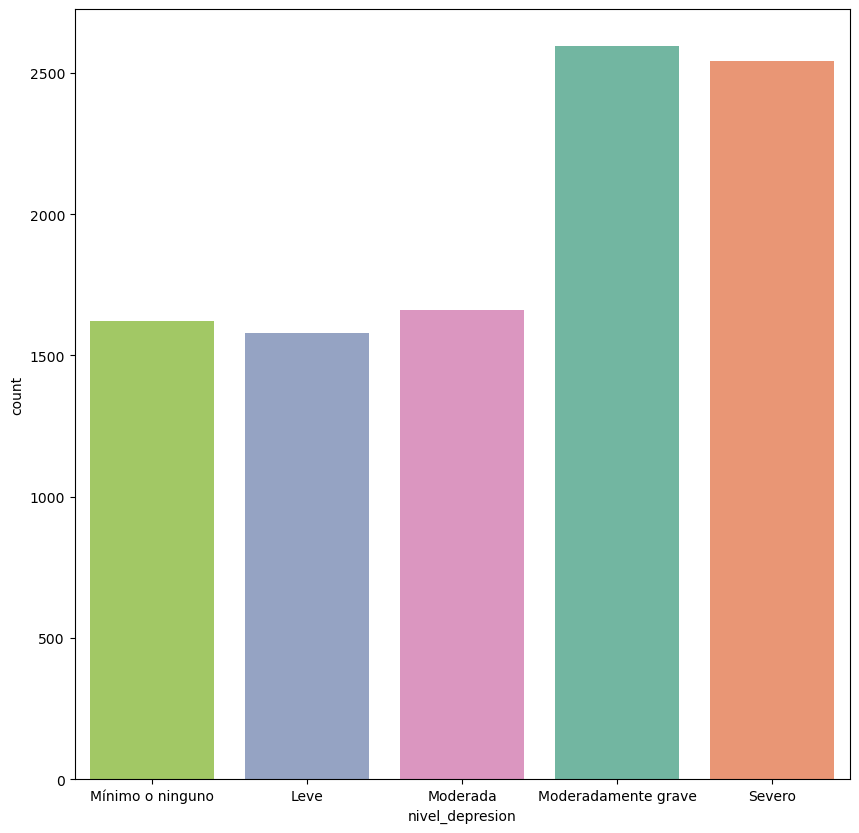

In [ ]:
orden_categorias_depresion = [
    "Mínimo o ninguno",
    "Leve",
    "Moderada",
    "Moderadamente grave",
    "Severo",
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='nivel_depresion', 
    data=df, 
    hue='nivel_depresion', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_depresion  # <-- aquí indicamos el orden
)
plt.show()

In [ ]:
# Contar cuántos valores son mayores a 21
cantidad_fuera_rango_ansiedad = (df['anxiety_score'] > 21).sum()
print("Cantidad de filas con anxiety_score > 21:", cantidad_fuera_rango_ansiedad)

Cantidad de filas con anxiety_score > 21: 0


In [ ]:
categorizacion_ansiedad = []

for score in df["anxiety_score"]:
    if 0 <= score <= 4:
        categorizacion_ansiedad.append("Mínimo o ninguno")
    elif 5 <= score <= 9:
        categorizacion_ansiedad.append("Leve")
    elif 10 <= score <= 14:
        categorizacion_ansiedad.append("Moderado")
    elif 15 <= score <= 21:
        categorizacion_ansiedad.append("Severo")
    else:
        categorizacion_ansiedad.append("Fuera de rango")  

df["nivel_ansiedad"] = categorizacion_ansiedad

print(df[["anxiety_score", "nivel_ansiedad"]])


      anxiety_score    nivel_ansiedad
0                17            Severo
1                11          Moderado
2                 7              Leve
3                 0  Mínimo o ninguno
4                12          Moderado
...             ...               ...
9995             21            Severo
9996             12          Moderado
9997             18            Severo
9998             21            Severo
9999             16            Severo

[10000 rows x 2 columns]


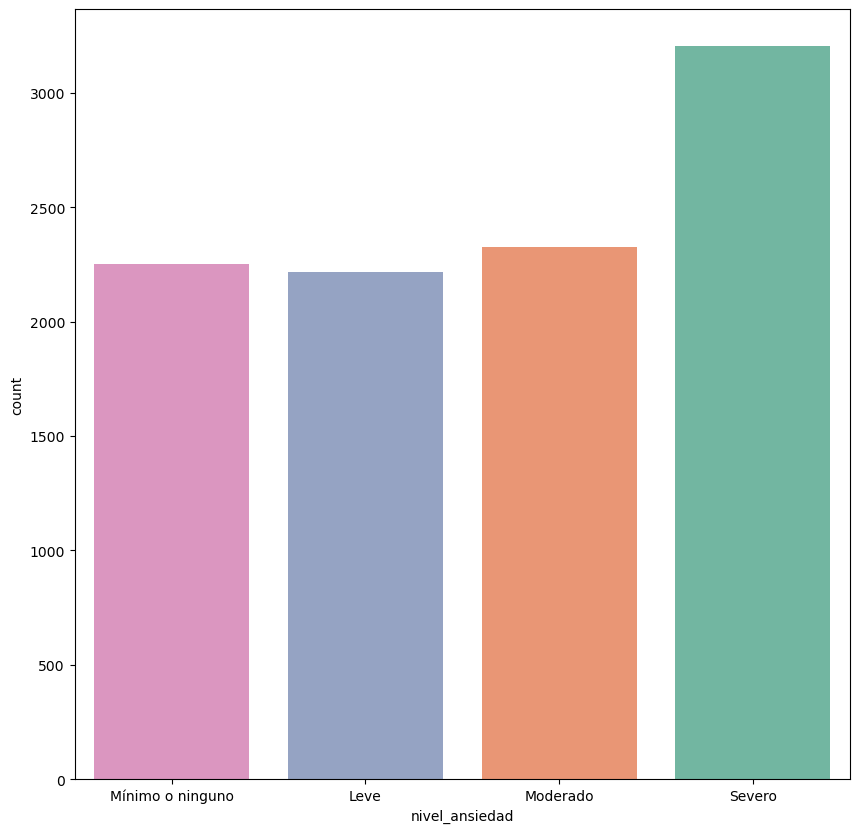

In [ ]:
orden_categorias_ansiedad = [
    "Mínimo o ninguno",
    "Leve",
    "Moderado",
    "Severo"
]

plt.figure(figsize=(10,10))
sns.countplot(
    x='nivel_ansiedad', 
    data=df, 
    hue='nivel_ansiedad', 
    palette='Set2', 
    legend=False,
    order=orden_categorias_ansiedad  # <-- aquí indicamos el orden
)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
 14  nivel_depresion_v2      10000 non-null 